In [5]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import bernoulli, cauchy, norm, gamma, poisson, binom, uniform, laplace, expon, trim_mean, iqr, beta, chi2_contingency, kstwobign, kstest, ttest_ind, mannwhitneyu
from scipy.stats import anderson, shapiro, normaltest, weibull_min, anderson_ksamp, permutation_test, ks_2samp, t, kruskal
import scipy.stats as sts
import statistics
from tqdm import tqdm
from matplotlib import rc
from math import pi, log, tan, sin, inf
from scipy.optimize import minimize
from numpy import std
import scipy.special
import statsmodels.api as sm
import pandas as pd

# №1

In [6]:
def tt_l (n, m, k):
    mur = np.arange(0, 25)/25
    tt=np.zeros((5, len(mur)))
    alpha = 0.05
    data1 = laplace.rvs(loc =0, scale =1, size = (m, n))
    for j, mu in tqdm(enumerate(mur)):
        data2 = laplace.rvs(loc =mu, scale = 1/2, size = (m, n))
        tt[0][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = k).pvalue < 0.05)
        tt[1][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 1, permutations = k).pvalue < 0.05)
        tt[2][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = 0).pvalue < 0.05)
        tt[3][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 1, permutations = 0).pvalue < 0.05)
        tt[4][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = k*10).pvalue < 0.05)
    plt.plot(mur, tt[2], label = f'ttest, n ={n} ')
    plt.plot(mur, tt[0], label = f'ttest + p = {k}, n = {n}')
    plt.plot(mur, tt[4], label = f'ttest + p = {k*10}, n = {n}')
    plt.plot(mur, tt[3], label = f'ttest + e, n = {n}')
    plt.plot(mur, tt[1], label = f'ttest + e + p = {k}, n = {n}')
    plt.legend(title = 'tests')
    plt.title(r'$Power, ttest, laplace$')

In [7]:
def tt_n (n, m, k):
    mur = np.arange(0, 25)/25
    tt=np.zeros((5, len(mur)))
    alpha = 0.05
    data1 = norm.rvs(loc =0, scale =1, size = (m, n))
    for j, mu in tqdm(enumerate(mur)):
        data2 = norm.rvs(loc =mu, scale = 1, size = (m, n))
        tt[0][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = k).pvalue < 0.05)
        tt[1][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 1, permutations = k).pvalue < 0.05)
        tt[2][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = 0).pvalue < 0.05)
        tt[3][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 1, permutations = 0).pvalue < 0.05)
        tt[4][j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = k*10).pvalue < 0.05)
    plt.plot(mur, tt[2], label = f'ttest, n ={n} ')
    plt.plot(mur, tt[0], label = f'ttest + perm = {k}, n = {n}')
    plt.plot(mur, tt[4], label = f'ttest + perm = {k*10}, n = {n}')
    plt.plot(mur, tt[3], label = f'ttest + equal, n = {n}')
    plt.plot(mur, tt[1], label = f'ttest + equal + perm = {k}, n = {n}')
    plt.legend(title = 'tests')
    plt.title(r'$Power, ttest, norm$')

In [8]:
def mw_n (n, m):
    mur = np.arange(0, 100)/25
    tt=np.zeros((3, len(mur)))
    alpha = 0.05
    data1 = norm.rvs(loc =0, scale =1, size = (m, n))
    for j, mu in tqdm(enumerate(mur)):
        data2 = norm.rvs(loc =mu, scale = 1, size = (m, n))
        tt[0][j] = np.mean([(mannwhitneyu(data1[i], data2[i],  method = 'exact' ).pvalue < 0.05) for i in range(m)])
        tt[1][j] = np.mean([(mannwhitneyu(data1[i], data2[i],  method = 'asymptotic').pvalue < 0.05) for i in range(m)])

    plt.plot(mur, tt[0], label = f'mw, exact, n ={n} ')
    plt.plot(mur, tt[1], label = f'mw, asymptotic, n = {n}')
    plt.legend(title = 'tests')
    plt.title(r'$Power, Mann- Whitney, norm$')

In [9]:
def mw_l (n, m):
    mur = np.arange(0, 100)/25
    tt=np.zeros((2, len(mur)))
    alpha = 0.05
    data1 = laplace.rvs(loc =0, scale =1, size = (m, n))
    for j, mu in enumerate(mur):
        data2 = laplace.rvs(loc =mu, scale = 1/2, size = (m, n))
        tt[0][j] = np.mean(mannwhitneyu(data1, data2, axis = 1, method = 'exact' ).pvalue < 0.05)
        tt[1][j] = np.mean(mannwhitneyu(data1, data2, axis = 1, method = 'asymptotic').pvalue < 0.05)
    plt.plot(mur, tt[0], label = f'mw, exact, n ={n} ')
    plt.plot(mur, tt[1], label = f'mw, asymptotic, n = {n}')
    plt.legend(title = 'tests')
    plt.title(r'$Power, Mann- Whitney, laplace$')


In [10]:
def mw_tt_n(n, m):
    mur = np.arange(0, 100)/25
    tt=np.zeros( len(mur))
    mw=np.zeros(len(mur))
    alpha = 0.05
    data1 = norm.rvs(loc =0, scale =1, size = (m, n))
    for j, mu in enumerate(mur):
        data2 = norm.rvs(loc =mu, scale = 1, size = (m, n))
        tt[j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = 0).pvalue < 0.05)
        mw[j] = np.mean(mannwhitneyu(data1, data2, axis = 1).pvalue < 0.05)
    plt.plot(mur, tt, label = f'ttest, n = {n}')
    plt.plot(mur, mw, label = f'mw, n = {n}')
    plt.legend(title = 'tests')
    plt.title(r'$Power, norm$')

In [11]:
def mw_tt_l(n, m):
    mur = np.arange(0, 100)/25
    tt=np.zeros( len(mur))
    mw=np.zeros(len(mur))
    alpha = 0.05
    data1 = laplace.rvs(loc =0, scale =1, size = (m, n))
    for j, mu in enumerate(mur):
        data2 = laplace.rvs(loc =mu, scale = 1/2, size = (m, n))
        tt[j] = np.mean(ttest_ind(data1, data2, axis =1, equal_var = 0, permutations = 0).pvalue < 0.05)
        mw[j] = np.mean(mannwhitneyu(data1, data2, axis = 1).pvalue < 0.05)
    plt.plot(mur, tt, label = f'ttest, n = {n}')
    plt.plot(mur, mw, label = f'mw, n = {n}')
    plt.legend(title = 'tests')
    plt.title(r'$Power, laplace$')
    # plt.title(r'$Power, Mann- Whitney$')

### n = 10

25it [00:11,  2.11it/s]


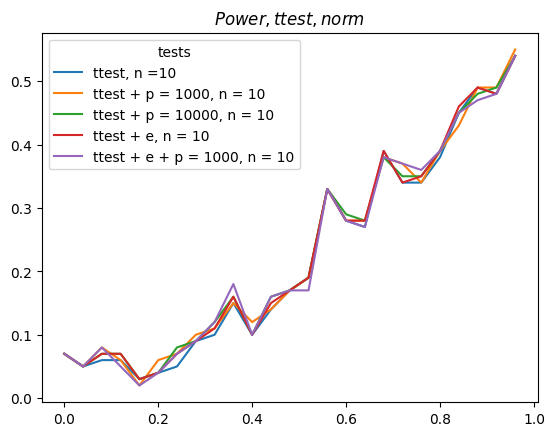

In [ ]:
tt_n(10, 100, 1000)

100it [00:24,  4.04it/s]


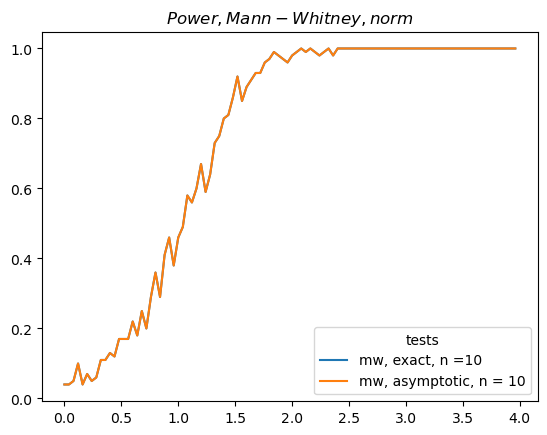

In [3]:
mw_n(10, 100)

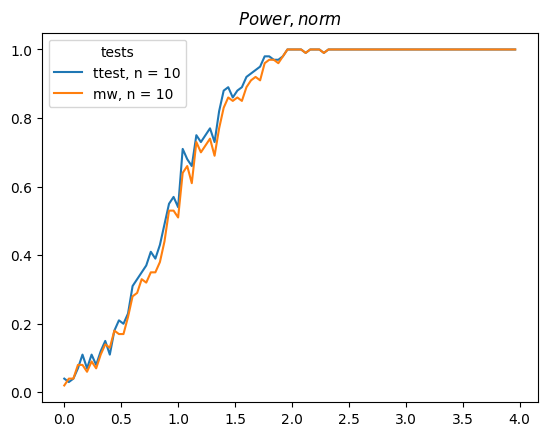

In [ ]:
mw_tt_n(10, 100)

### n = 50

25it [00:39,  1.60s/it]


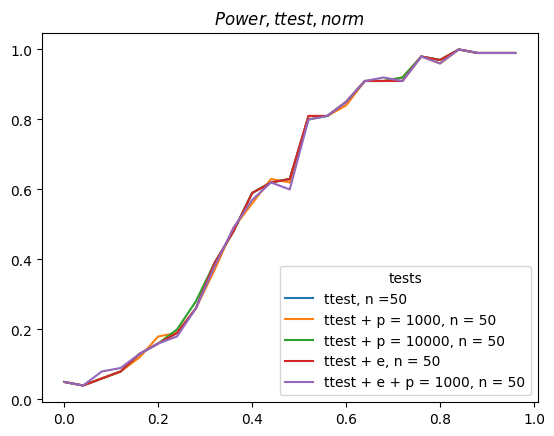

In [ ]:
tt_n(50, 100, 1000)

100it [00:27,  3.62it/s]


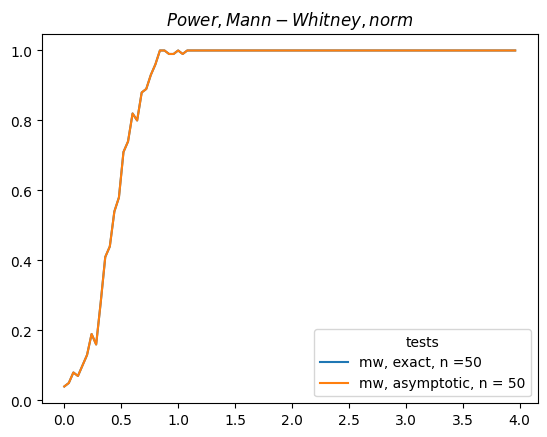

In [ ]:
mw_n(50, 100)

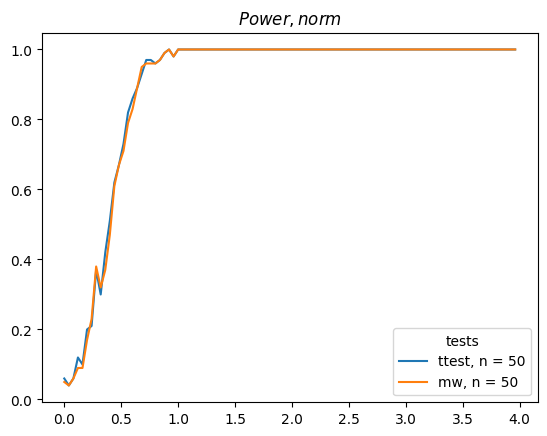

In [ ]:
mw_tt_n(50, 100)

### n = 100

25it [01:12,  2.91s/it]


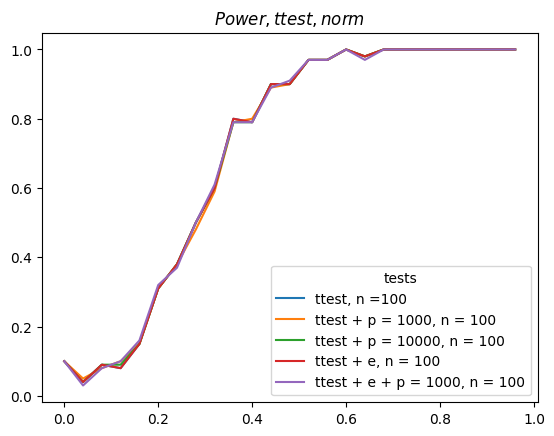

In [ ]:
tt_n(100, 100, 1000)

100it [01:14,  1.35it/s]


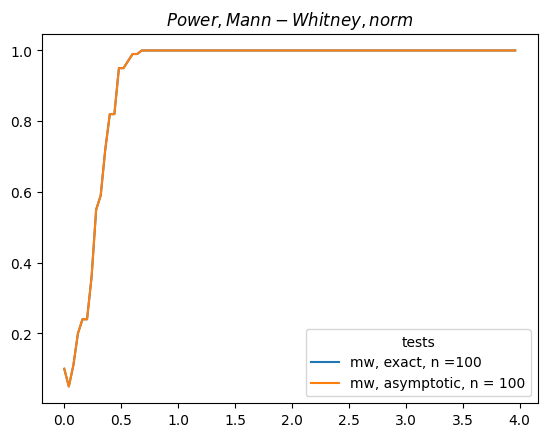

In [ ]:
mw_n(100, 100)

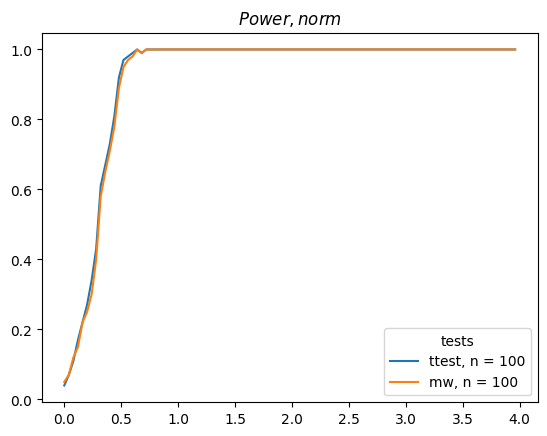

In [ ]:
mw_tt_n(100, 100)

### n = 10

25it [00:11,  2.09it/s]


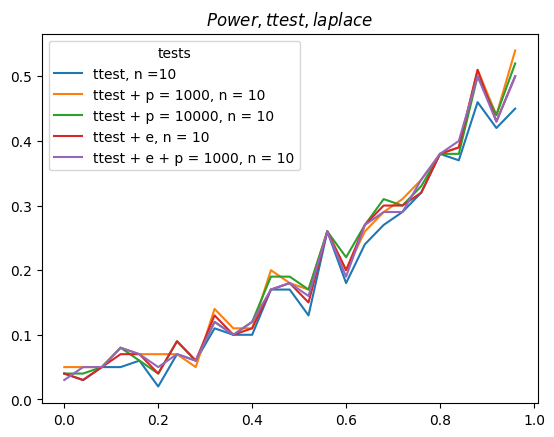

In [ ]:
tt_l(10, 100, 1000)

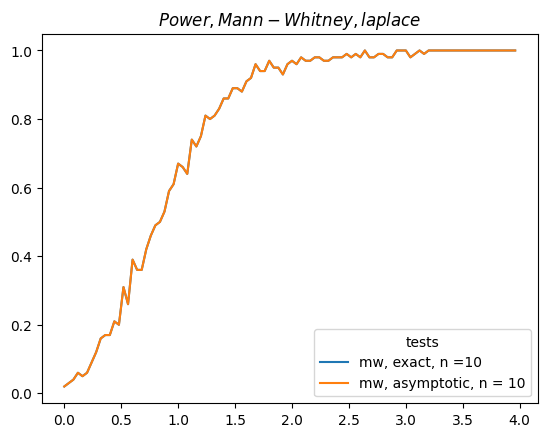

In [ ]:
mw_l(10, 100)

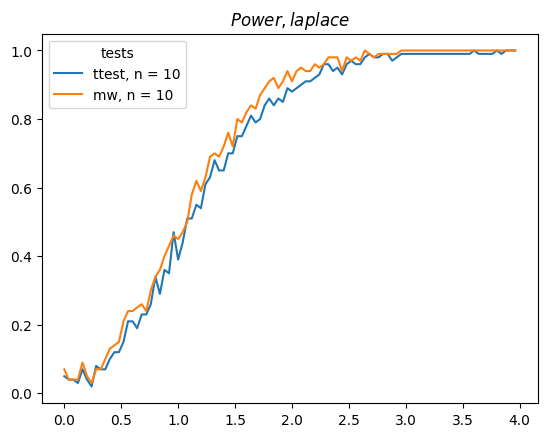

In [ ]:
mw_tt_l(10, 100)

### n = 50

25it [00:35,  1.43s/it]


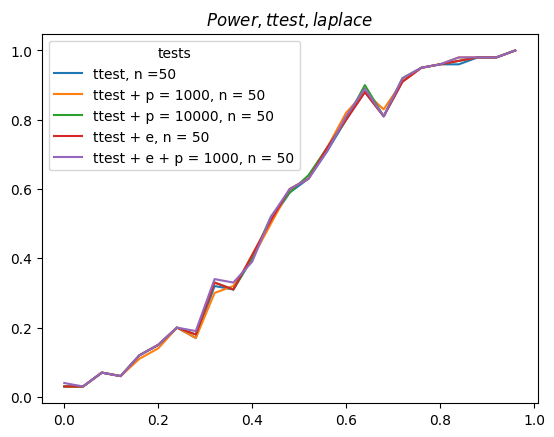

In [ ]:
tt_l(50, 100, 1000)

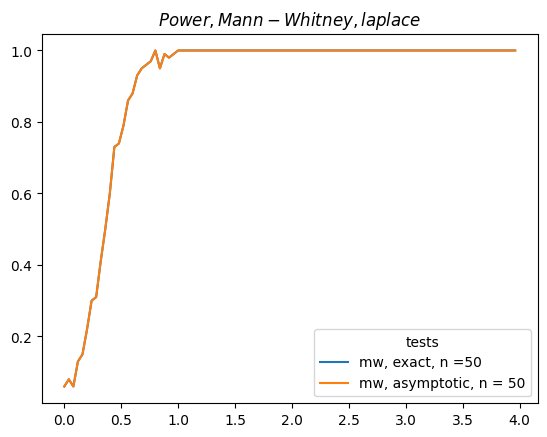

In [ ]:
mw_l(50, 100)

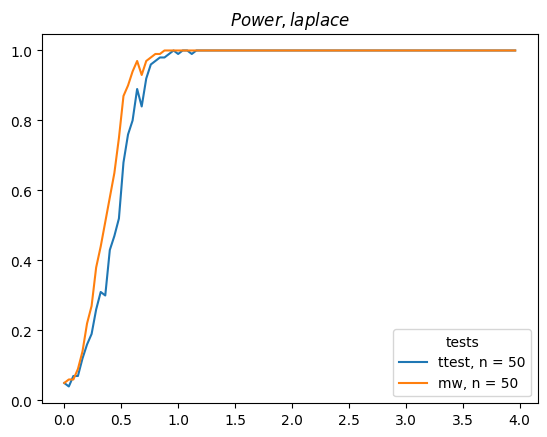

In [ ]:
mw_tt_l(50, 100)

### n = 100

25it [01:11,  2.86s/it]


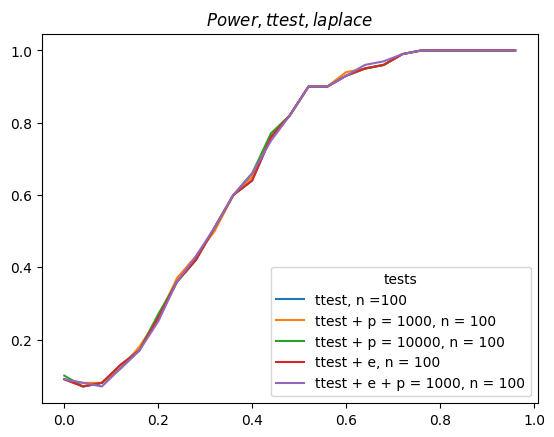

In [ ]:
tt_l(100, 100, 1000)

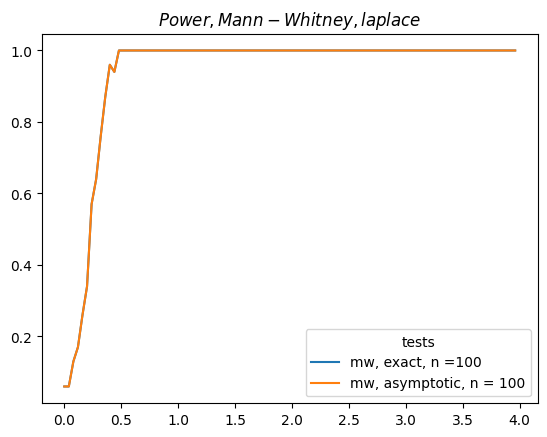

In [ ]:
mw_l(100, 100)


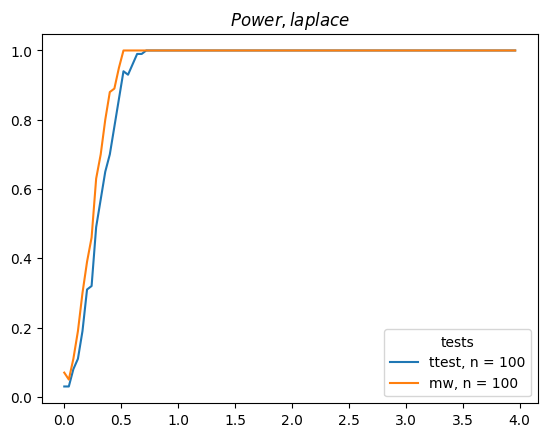

In [ ]:
mw_tt_l(100, 100)

# №2

In [3]:
n1, n2 = 1000, 1000
m = 10000
data1 = uniform.rvs(loc =0, scale = 1, size = (m,n1))
data2 = uniform.rvs(loc =0, scale = 1, size = (m,n1))
data = np.sort(np.concatenate((data1, data2), axis = 1))
data1 = np.sort(data1, axis =1)
data2 = np.sort(data2, axis =1)
r = [np.searchsorted(data[i], data1[i])+1 for i in range(m)]
s = [np.searchsorted(data[i], data2[i])+1 for i in range(m)]
sum1 = np.array([np.sum( np.array([((r[i][j] - ((n1+n2)*(1+j)) / n1)**2 )/(((j+1)/(n1+1))*(1 - (j+1)/(n1+1))*n2*(n1+n2)/n1) for j in range(n1)])) for i in range(m)])
sum2 = np.array([np.sum(np.array([((s[i][j] - (n1+n2)*(1+j)/n2)**2)/(((j+1)/(n2+1))*(1 - (1+j)/(n2+1))*n1*(n1+n2)/n2) for j in range(n2)])) for i in range(m)])
T = sum1/(2*n1) + sum2/(2*n2)
with open('BWS.txt', 'w') as f:
    f.writelines(f"{item}\n" for item in T)
mk = ECDF(T)

In [12]:
with open('BWS.txt', 'r') as file:
    lines = file.readlines()
lines = list(map(float, lines))

mk = ECDF(lines)

In [13]:
def bwsh_pv(data1, data2, n1, n2, m):
    data = np.sort(np.concatenate((data1, data2), axis = 1))
    data1 = np.sort(data1, axis =1)
    data2 = np.sort(data2, axis =1)
    r = [np.searchsorted(data[i], data1[i])+1 for i in range(m)]
    s = [np.searchsorted(data[i], data2[i])+1 for i in range(m)]
    sum1 = np.array([np.sum( np.array([  ((r[i][j] - ((n1+n2)*(1+j)) / n1)**2 )/(((j+1)/(n1+1))*(1 - (j+1)/(n1+1))*n2*(n1+n2)/n1) for j in range(n1)])) for i in range(m)])
    sum2 = np.array([np.sum(np.array([  ((s[i][j] - (n1+n2)*(1+j)/n2)**2)/(((j+1)/(n2+1))*(1 - (1+j)/(n2+1))*n1*(n1+n2)/n2) for j in range(n2)])) for i in range(m)])
    T = sum1/(2*n1) + sum2/(2*n2)
    return np.sort(1 - F_AD(T))

In [14]:
def comp(data1, data2, n1, n2, m, s):
    rng = np.random.default_rng()
    method = sts.PermutationMethod(n_resamples=200, random_state=rng)
    pv1 = np.sort(np.array([anderson_ksamp(samples = [data1[i], data2[i]], method = method).pvalue for i in range(m)]))
    pv2 = bwsh_pv(data1, data2, n1, n2, m)
    R = np.arange(1,m+1)/m
    plt.plot(pv1, R, label = 'anderson_ksamp' )
    plt.plot(pv2, R, label = 'bws')
    plt.plot(R,R, linestyle='dashed', color='gray')
    plt.legend(title = 'tests')
    plt.title(s)

In [15]:
with open('AD.txt', 'r') as file:
    lines = file.read().splitlines()
lines = list(map(float, lines))
F_AD = ECDF(lines)

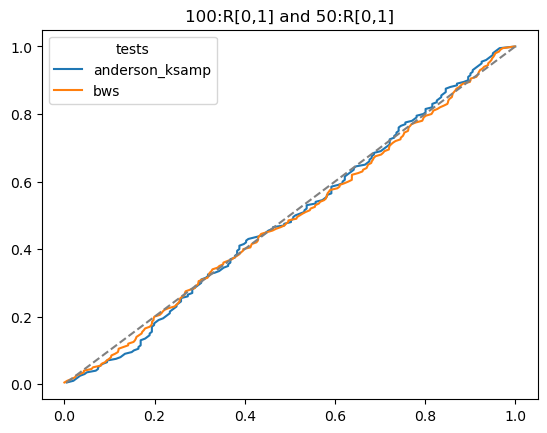

In [16]:
n1, n2 = 100, 50
m = 200
data1= uniform.rvs(loc =0, scale = 1, size = (m,n1))
data2= uniform.rvs(loc =0, scale = 1, size = (m,n2))
comp(data1, data2, n1, n2, m, '100:R[0,1] and 50:R[0,1]' )

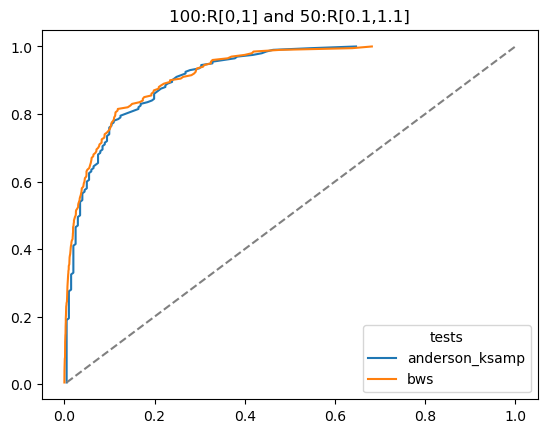

In [9]:
n1, n2 = 100, 50
m = 200
data1= uniform.rvs(loc =0, scale = 1, size = (m,n1))
data2= uniform.rvs(loc =0.1, scale = 1, size = (m,n2))
comp(data1, data2, n1, n2, m, '100:R[0,1] and 50:R[0.1,1.1]' )

# №3

In [11]:
def comp3(data1, data2, n1, n2, m, s):
    rng = np.random.default_rng()
    method = sts.PermutationMethod(n_resamples=200, random_state=rng)
    pv_ksamp = np.sort(np.array([anderson_ksamp([data1[i], data2[i]], method = method).pvalue for i in range(m)]))
    pv_mw =  np.sort([mannwhitneyu(data1[i], data2[i] ).pvalue for i in range(m)])
    pv_bws = bwsh_pv(data1, data2, n1, n2, m)
    pv_ks_2 = np.sort(ks_2samp(data1 = data1, data2 = data2, axis = 1).pvalue)
    R = np.arange(1,m+1)/m
    plt.plot(pv_ksamp, R, label = 'Stiven-Scholz' )
    plt.plot(pv_bws, R, label = 'BWS')
    plt.plot(pv_mw, R, label = 'Mann-Whitney')
    plt.plot(pv_ks_2, R, label = 'Smirnov')
    plt.plot(R,R, linestyle='dashed', color='gray')
    plt.legend(title = 'tests')
    plt.title(s)

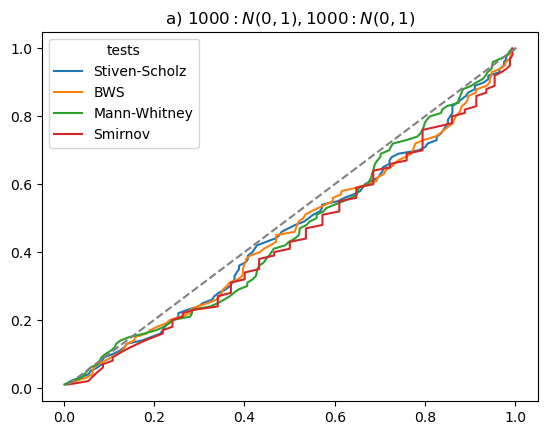

In [12]:
n1, n2 = 1000, 1000
m = 100
data1 = norm.rvs(loc = 0, scale = 1, size = (m, n1))
data2 = norm.rvs(loc = 0, scale = 1, size = (m, n2))
comp3(data1, data2, n1, n2, m, r'a) $1000:N(0, 1), 1000:N(0, 1)$')

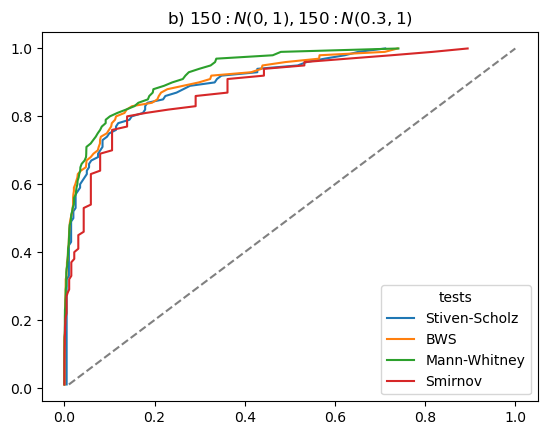

In [13]:
n1, n2 = 150, 150
m = 100
data1 = norm.rvs(loc = 0, scale = 1, size = (m, n1))
data2 = norm.rvs(loc = 0.3, scale = 1, size = (m, n2))
comp3(data1, data2, n1, n2, m, r'b) $150:N(0, 1), 150:N(0.3, 1)$')

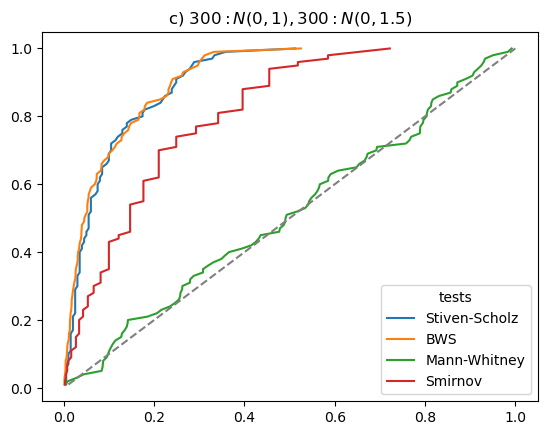

In [14]:
n1, n2 = 300, 300
m = 100
data1 = norm.rvs(loc = 0, scale = 1, size = (m, n1))
data2 = norm.rvs(loc = 0, scale = 1.5**0.5, size = (m, n2))
comp3(data1, data2, n1, n2, m, r'c) $300:N(0, 1), 300:N(0, 1.5)$')

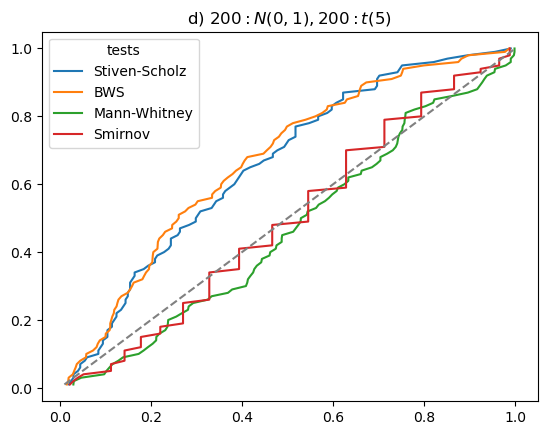

In [15]:
n1, n2 = 200, 200
m = 100
data1 = norm.rvs(loc = 0, scale = 1, size = (m, n1))
data2 = t.rvs(loc = 0, scale = 1, df =5,  size = (m, n2))
comp3(data1, data2, n1, n2, m, r'd) $200:N(0, 1), 200:t(5)$')

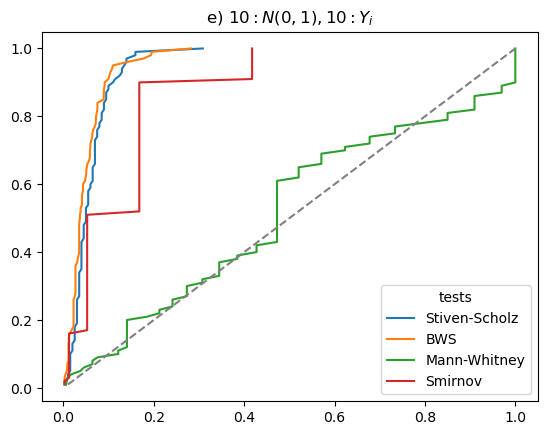

In [16]:
n1, n2 = 10, 10
m = 100
k = 100
data1 = norm.rvs(loc = 0, scale = 1, size = (m, n1))
u = uniform.rvs(loc = -1, scale = 2,   size = (m, n2, k))
data2 = (np.sum(u, axis = 2)) * (3**0.5)
comp3(data1, data2, n1, n2, m, r'e) $10:N(0, 1), 10:Y_i$')